In [1]:
import pandas as pd
import numpy as np

# Load the dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The TotalCharges columns is in the string instead of integer. Hence we need to convert this. 

In [5]:
df.shape

(7043, 21)

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

###### The TotalCharges column has 11 null values which we will fill it by medium values 

In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)

C:\Users\raths\AppData\Local\Temp\ipykernel_2808\2195003498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace = True)


# Encoding 

Convert the categorical column to numerical value using label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Binary categorical columns to convert first

In [11]:
binary_cols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

In [12]:
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

One hot encoding for multi-category columns

In [13]:
df = pd.get_dummies(df, drop_first = True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


# EDA

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

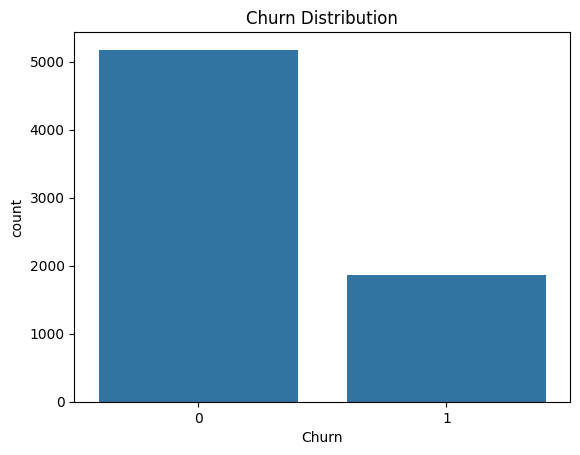

In [17]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

Most important features affecting churn

In [18]:
# plt.figure(figsize=(12,6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title("Feature Correlation")
# plt.show()

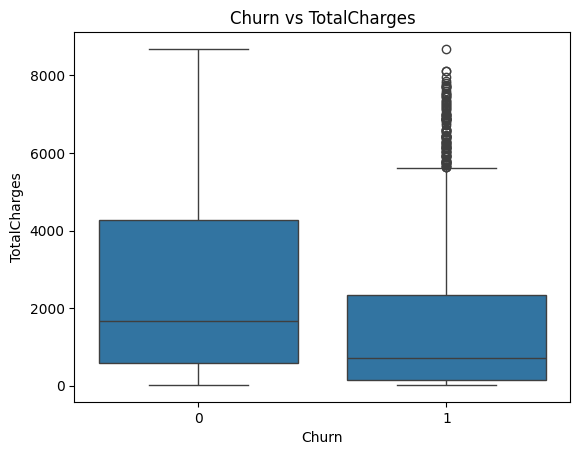

In [19]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title("Churn vs TotalCharges")
plt.show()

# PCA

CustomerID is not useful for the modelling droping the column

In [63]:
# df.drop(columns=['customerID'], inplace=True)

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x = df.drop(columns=['Churn'])

In [68]:
y = df['Churn']

In [69]:
x_scaled = scaler.fit_transform(x)

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA()

In [72]:
x_pca = pca.fit_transform(x_scaled)

In [73]:
explained_variance = pca.explained_variance_ratio_

Text(0.5, 1.0, 'Explained variance vs Number of components')

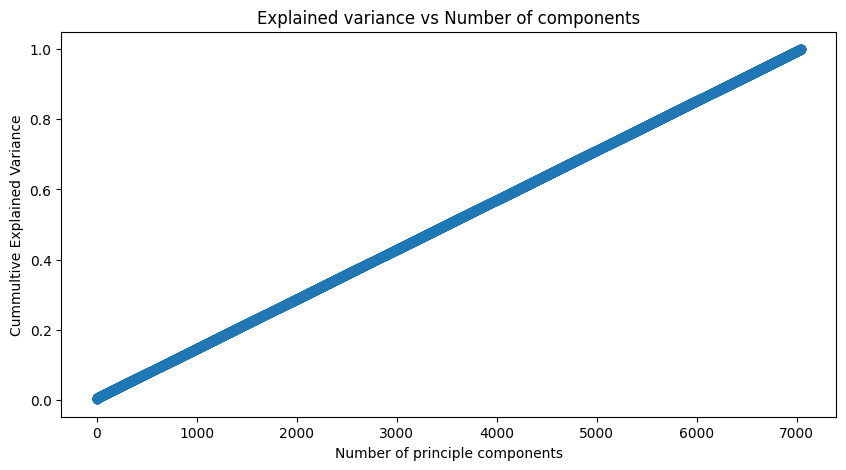

In [74]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of principle components")
plt.ylabel("Cummultive Explained Variance")
plt.title("Explained variance vs Number of components")

In [75]:
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"Optimal number of components : {n_components}")


Optimal number of components : 6688


In [76]:
pca = PCA(n_components=n_components)
x_pca_reduced = pca.fit_transform(x_scaled)

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_reduced, y, test_size=0.2, random_state=4)

In [78]:
print(f"New shape after PCA : {x_train.shape}")

New shape after PCA : (5634, 6688)


Logistic regression model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [81]:
y_pred = model.predict(x_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after PCA : {accuracy}")

Accuracy after PCA : 0.7040454222853088


In [83]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1035
           1       0.45      0.53      0.49       374

    accuracy                           0.70      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.70      0.71      1409



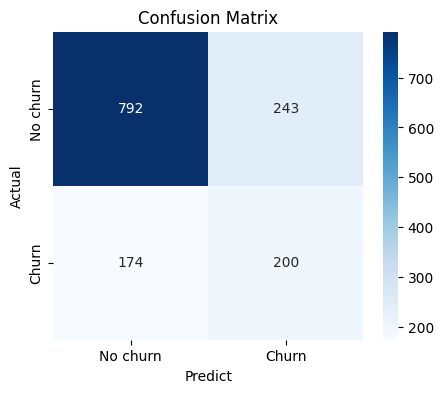

In [84]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d' , cmap='Blues', xticklabels=['No churn', 'Churn'], yticklabels=['No churn', 'Churn'])
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

Without PCA

In [85]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [86]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
df.drop(columns=['customerID'], inplace = True)

In [88]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [89]:
df = pd.get_dummies(df, drop_first=True)

In [98]:
x = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

In [99]:
scaler = StandardScaler()

In [100]:
x_scaled = scaler.fit_transform(x)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=4)

In [103]:
print(f"Original datset space : {x_train.shape}")

Original datset space : (5634, 6559)


In [104]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [105]:
y_pred = model.predict(x_test)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without PCA : {accuracy}")

Accuracy without PCA : 0.7629524485450674


In [107]:
print("Classification report :- ")
print(classification_report(y_test, y_pred))

Classification report :- 
              precision    recall  f1-score   support

       False       0.83      0.86      0.84      1035
        True       0.56      0.51      0.53       374

    accuracy                           0.76      1409
   macro avg       0.69      0.68      0.69      1409
weighted avg       0.76      0.76      0.76      1409



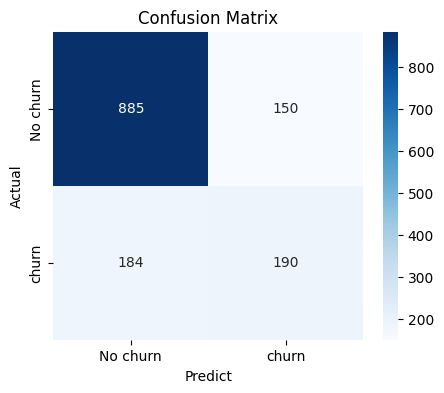

In [110]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No churn', 'churn'], yticklabels=['No churn', 'churn'])
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.title('Confusion Matrix')
plt.show()